In [1]:
import numpy as np
import pandas as pd
from datetime import datetime, date 


#可视化
import matplotlib.pyplot as plt
import seaborn as sns

#取消警告
import warnings 
warnings.filterwarnings('ignore') 

In [2]:
df = pd.read_csv('dataset\Aquifer\Aquifer_Petrignano.csv')
df.head()

Date  Rainfall_Bastia_Umbra  Depth_to_Groundwater_P24  \
0  14/03/2006                    NaN                    -22.48   
1  15/03/2006                    NaN                    -22.38   
2  16/03/2006                    NaN                    -22.25   
3  17/03/2006                    NaN                    -22.38   
4  18/03/2006                    NaN                    -22.60   

   Depth_to_Groundwater_P25  Temperature_Bastia_Umbra  Temperature_Petrignano  \
0                    -22.18                       NaN                     NaN   
1                    -22.14                       NaN                     NaN   
2                    -22.04                       NaN                     NaN   
3                    -22.04                       NaN                     NaN   
4                    -22.04                       NaN                     NaN   

   Volume_C10_Petrignano  Hydrometry_Fiume_Chiascio_Petrignano  
0                    NaN                                   NaN  
1                    NaN                                   NaN  
2                    NaN                                   NaN  
3                    NaN                                   NaN  
4                    NaN                                   NaN

In [3]:
#在第一个Rainfall数据出现以前，仅有Depth_to_Groundwater_P24和Depth_to_Groundwater_P25以及少量的Temperature_Petrignano的数据
df1 = df[df.Rainfall_Bastia_Umbra.notna()].reset_index(drop=True)
df1.head()

Date  Rainfall_Bastia_Umbra  Depth_to_Groundwater_P24  \
0  01/01/2009                    0.0                    -31.96   
1  02/01/2009                    0.0                    -32.03   
2  03/01/2009                    0.0                    -31.97   
3  04/01/2009                    0.0                    -31.91   
4  05/01/2009                    0.0                    -31.94   

   Depth_to_Groundwater_P25  Temperature_Bastia_Umbra  Temperature_Petrignano  \
0                    -31.14                       5.2                     4.9   
1                    -31.11                       2.3                     2.5   
2                    -31.07                       4.4                     3.9   
3                    -31.05                       0.8                     0.8   
4                    -31.01                      -1.9                    -2.1   

   Volume_C10_Petrignano  Hydrometry_Fiume_Chiascio_Petrignano  
0             -24530.688                                   2.4  
1             -28785.888                                   2.5  
2             -25766.208                                   2.4  
3             -27919.296                                   2.4  
4             -29854.656                                   2.3

In [4]:
#将 "Date" 列设置为索引，并将其转换为 DateTime 类型
df1['Date'] = pd.to_datetime(df1['Date'], format = '%d/%m/%Y')
df1.head()

Date  Rainfall_Bastia_Umbra  Depth_to_Groundwater_P24  \
0 2009-01-01                    0.0                    -31.96   
1 2009-01-02                    0.0                    -32.03   
2 2009-01-03                    0.0                    -31.97   
3 2009-01-04                    0.0                    -31.91   
4 2009-01-05                    0.0                    -31.94   

   Depth_to_Groundwater_P25  Temperature_Bastia_Umbra  Temperature_Petrignano  \
0                    -31.14                       5.2                     4.9   
1                    -31.11                       2.3                     2.5   
2                    -31.07                       4.4                     3.9   
3                    -31.05                       0.8                     0.8   
4                    -31.01                      -1.9                    -2.1   

   Volume_C10_Petrignano  Hydrometry_Fiume_Chiascio_Petrignano  
0             -24530.688                                   2.4  
1             -28785.888                                   2.5  
2             -25766.208                                   2.4  
3             -27919.296                                   2.4  
4             -29854.656                                   2.3

In [5]:
#去掉没有用的
df1=df1.drop(['Temperature_Petrignano'], axis=1)

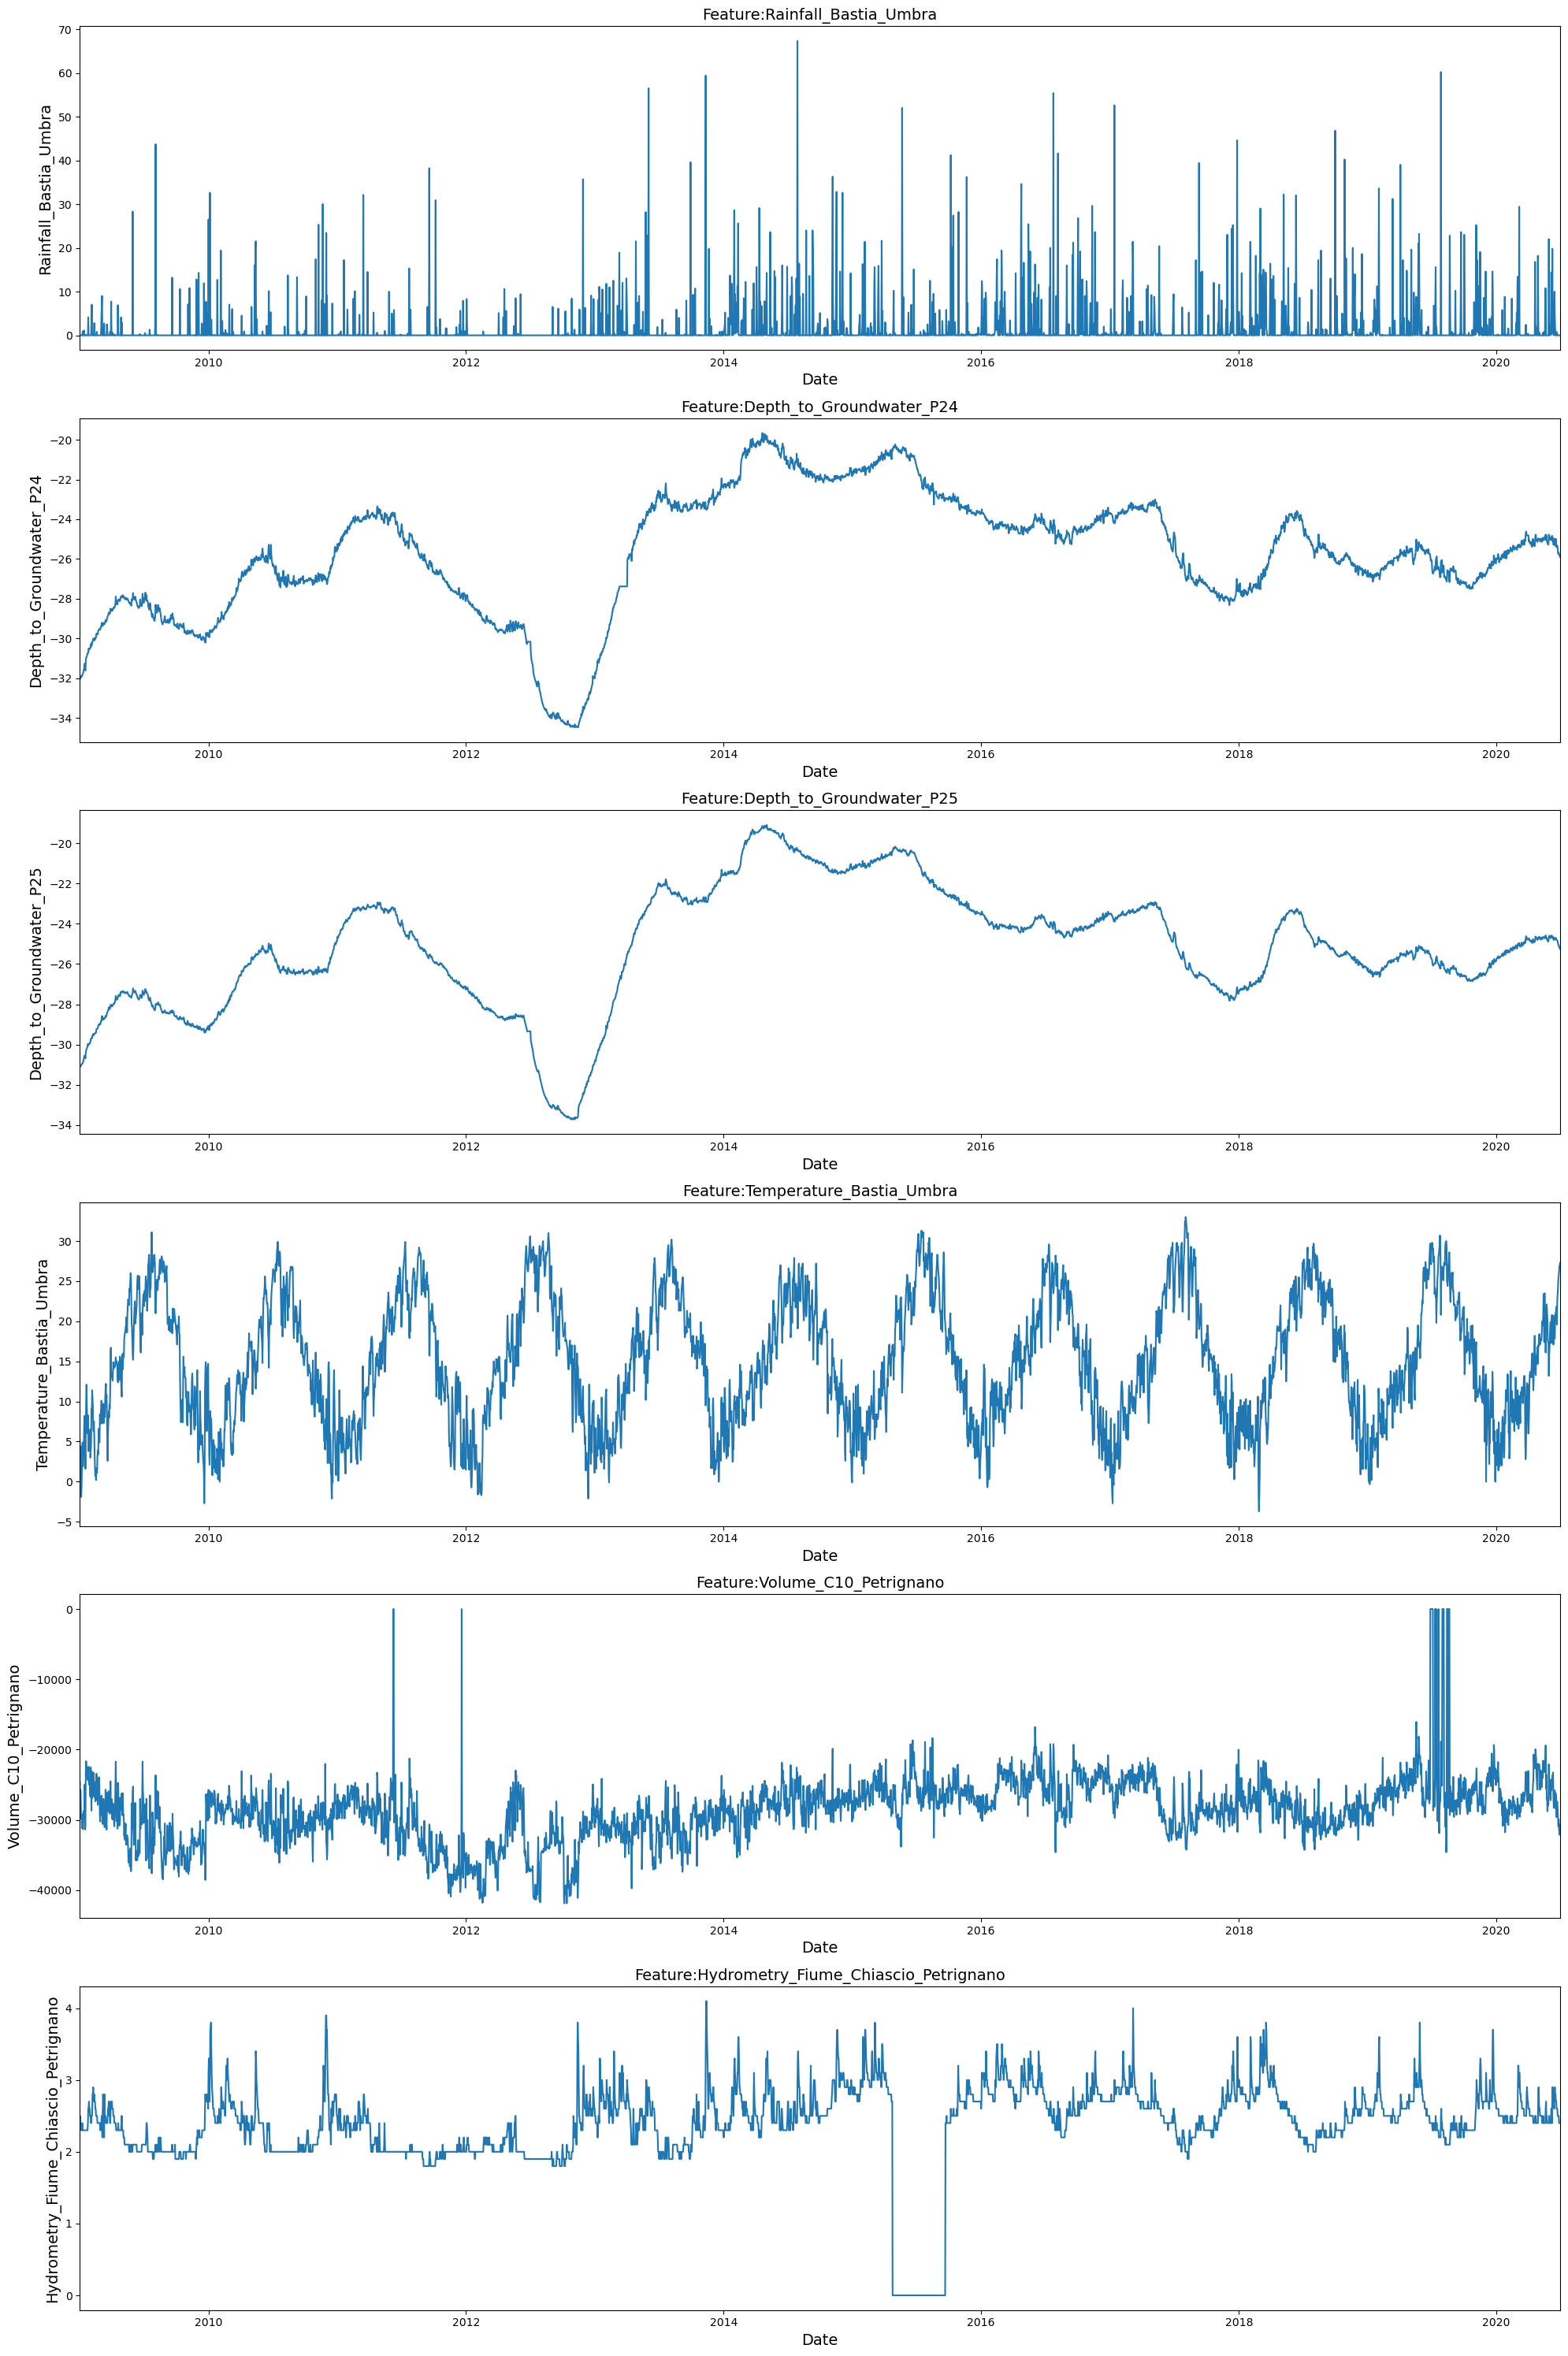

In [6]:
#出去日期有六列数据
f,ax = plt.subplots(nrows=6,ncols=1,figsize=(20,30))

#以列取修改后的数据，删去日期列作为x，其他数据作为y,并且对其中缺失的数据用前一个数据进行填充
for i,column in enumerate(df1.drop('Date',axis=1).columns):
    sns.lineplot(x=df1['Date'],y=df1[column].fillna(method='ffill'),ax=ax[i])
    ax[i].set_title('Feature:{}'.format(column),fontsize=14)
    ax[i].set_ylabel(ylabel=column,fontsize=14)
    ax[i].set_xlabel(xlabel='Date',fontsize=14)

    ax[i].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])        

plt.tight_layout()
    
    

    

In [7]:
#统计缺失值的数量
df1.isnull().sum()

Date                                     0
Rainfall_Bastia_Umbra                    0
Depth_to_Groundwater_P24                39
Depth_to_Groundwater_P25                27
Temperature_Bastia_Umbra                 0
Volume_C10_Petrignano                    1
Hydrometry_Fiume_Chiascio_Petrignano     0
dtype: int64

(14245.0, 18443.0)

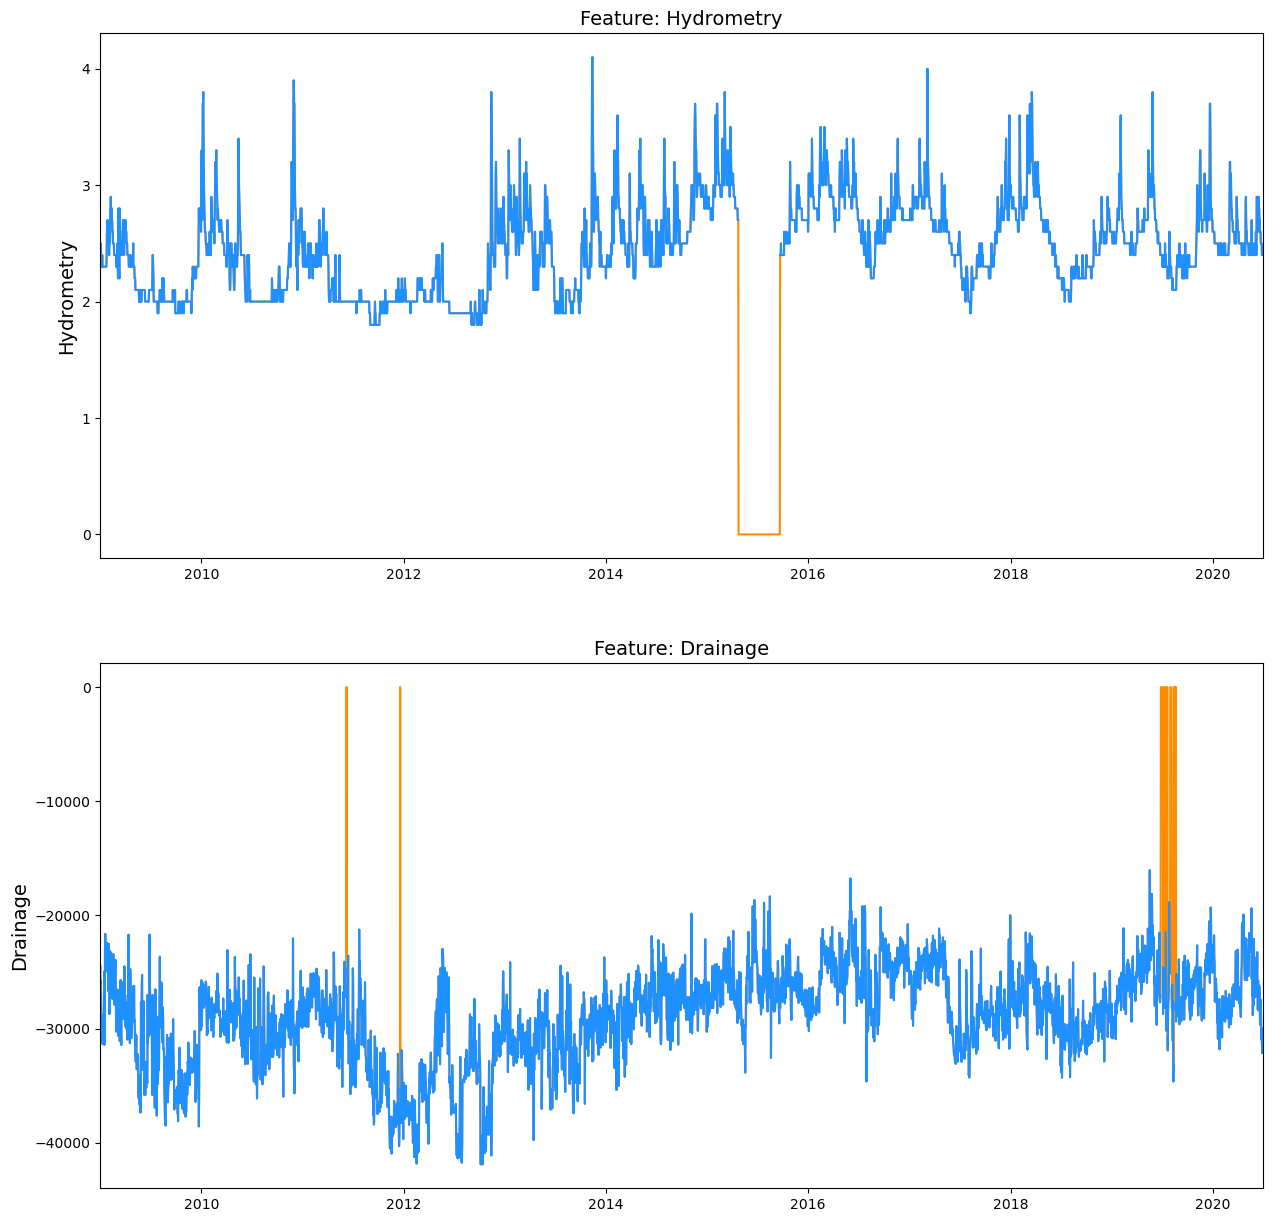

In [8]:
#发现volume有一个缺失值，实际上volume和hydrometry有许多0值都是需要处理的
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

old_hydrometry = df1['Hydrometry_Fiume_Chiascio_Petrignano'].copy()
df1['Hydrometry_Fiume_Chiascio_Petrignano'] = df1['Hydrometry_Fiume_Chiascio_Petrignano'].replace(0, np.nan)

ax[0].plot(df1['Date'], old_hydrometry,color='darkorange', label='original')
ax[0].plot(df1['Date'], df1['Hydrometry_Fiume_Chiascio_Petrignano'].fillna(np.inf),color='dodgerblue', label='modified')
ax[0].set_title('Feature: Hydrometry', fontsize=14)
ax[0].set_ylabel(ylabel='Hydrometry', fontsize=14)
ax[0].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

old_drainage = df1['Volume_C10_Petrignano'].copy()
df1['Volume_C10_Petrignano'] = df1['Volume_C10_Petrignano'].replace(0, np.nan)

ax[1].plot(df1['Date'], old_drainage,color='darkorange', label='original')
ax[1].plot(df1['Date'], df1['Volume_C10_Petrignano'].fillna(np.inf),color='dodgerblue', label='modified')
ax[1].set_title('Feature: Drainage', fontsize=14)
ax[1].set_ylabel(ylabel='Drainage', fontsize=14)
ax[1].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

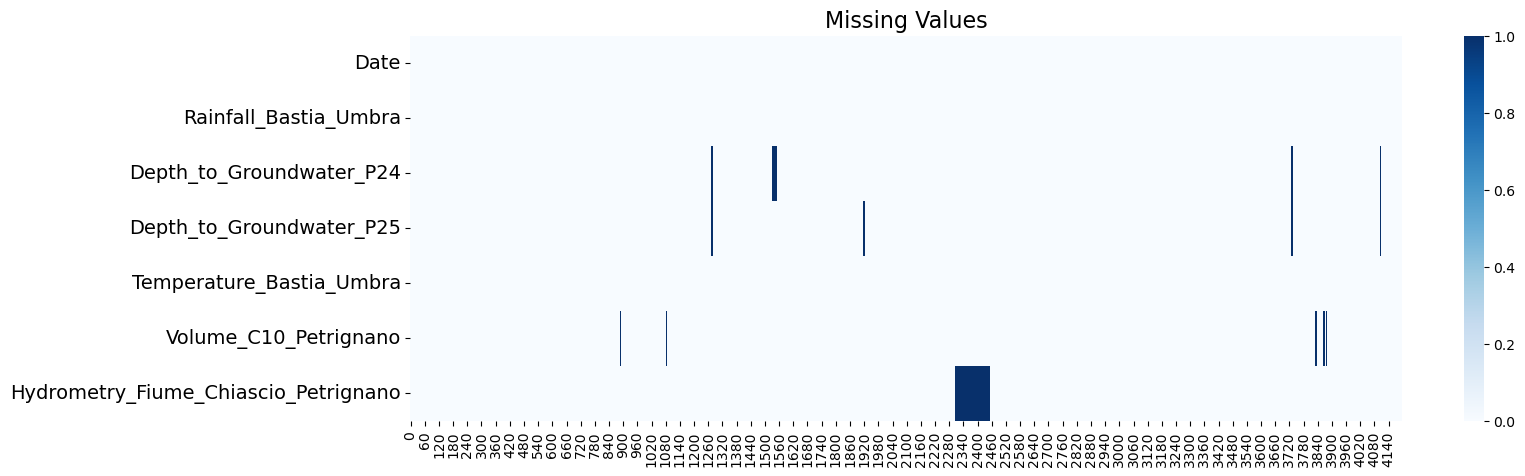

In [9]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,5))

sns.heatmap(df1.T.isna(), cmap='Blues')
ax.set_title('Missing Values', fontsize=16)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
plt.show()

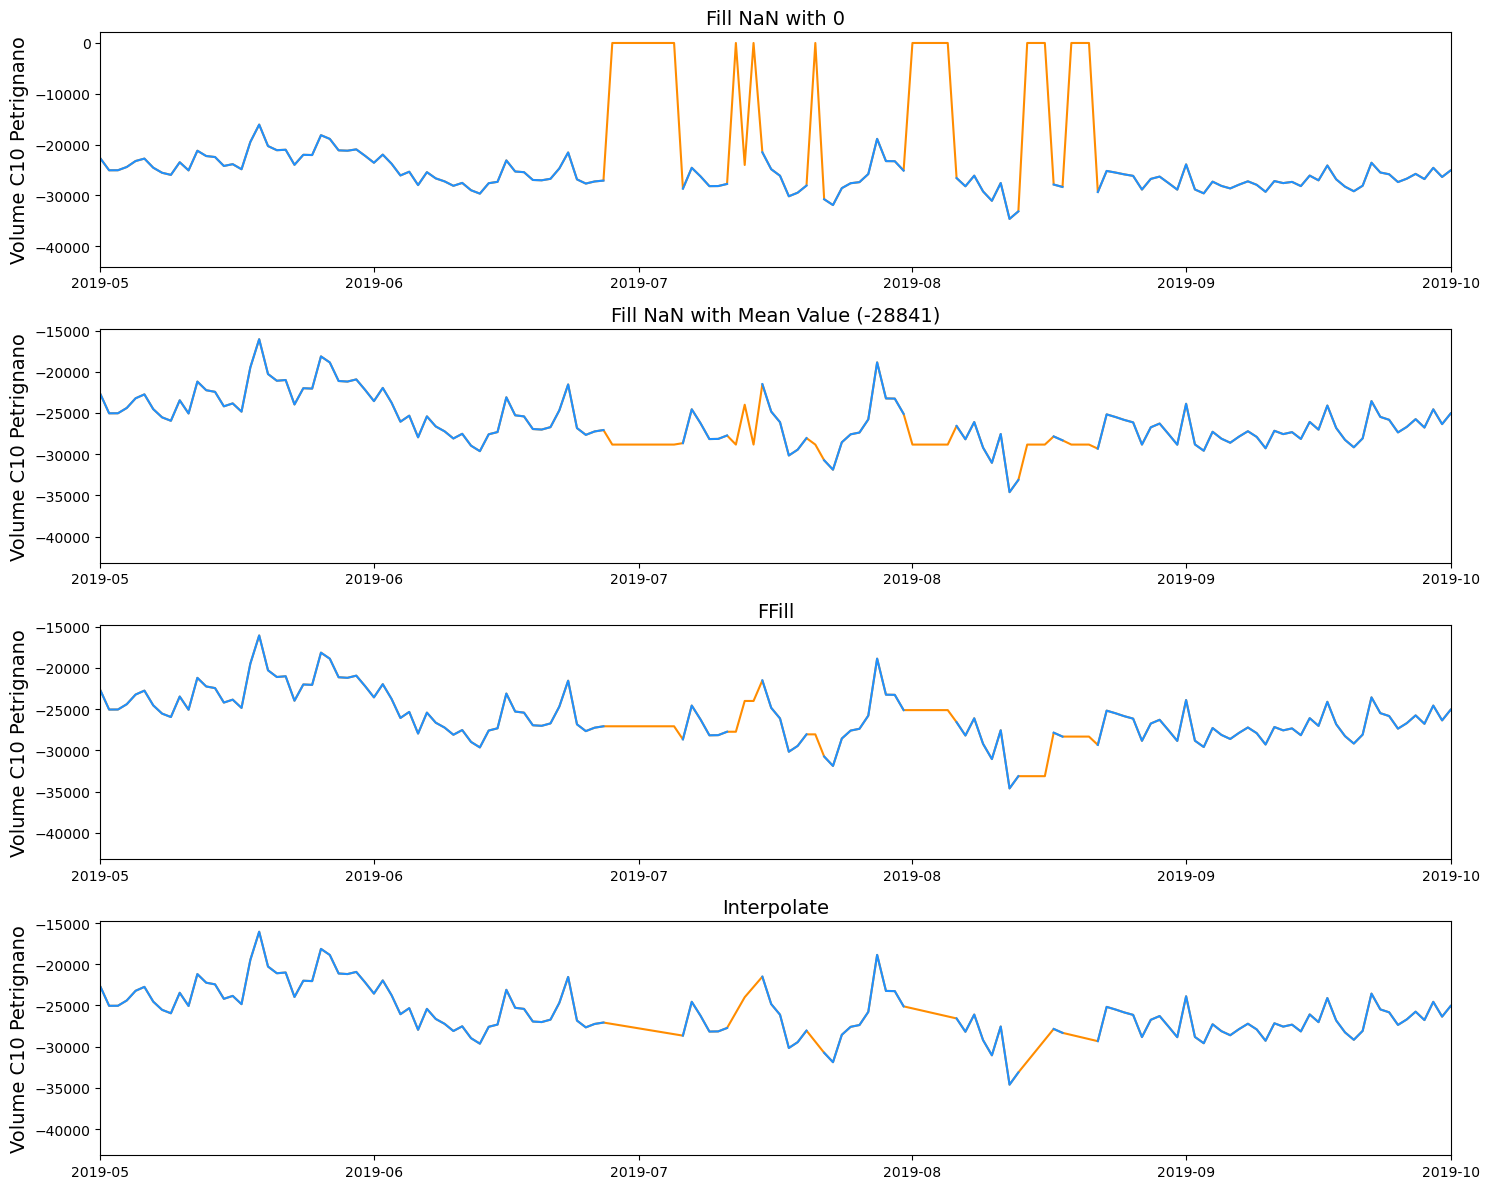

In [10]:
#使用四种不同的方式处理缺失值
f, ax = plt.subplots(nrows=4, ncols=1, figsize=(15, 12))
#插入0
ax[0].plot(df1['Date'],df1['Volume_C10_Petrignano'].fillna(0),color='darkorange', label = 'modified')
ax[0].plot(df1['Date'],df1['Volume_C10_Petrignano'].fillna(np.inf),color='dodgerblue', label = 'original')
ax[0].set_title('Fill NaN with 0', fontsize=14)
ax[0].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=14)
#插入均值
mean_drainage = df1['Volume_C10_Petrignano'].mean()
ax[1].plot(df1['Date'],df1['Volume_C10_Petrignano'].fillna(mean_drainage),color='darkorange', label = 'modified')
ax[1].plot(df1['Date'],df1['Volume_C10_Petrignano'].fillna(np.inf),color='dodgerblue', label = 'original')
ax[1].set_title(f'Fill NaN with Mean Value ({mean_drainage:.0f})', fontsize=14)
ax[1].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=14)
#向前填充
ax[2].plot(df1['Date'],df1['Volume_C10_Petrignano'].ffill(),color='darkorange', label = 'modified')
ax[2].plot(df1['Date'],df1['Volume_C10_Petrignano'].fillna(np.inf),color='dodgerblue', label = 'original')
ax[2].set_title(f'FFill', fontsize=14)
ax[2].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=14)
#线性插值
ax[3].plot(df1['Date'],df1['Volume_C10_Petrignano'].interpolate(),color='darkorange', label = 'modified')
ax[3].plot(df1['Date'],df1['Volume_C10_Petrignano'].fillna(np.inf),color='dodgerblue', label = 'original')
ax[3].set_title(f'Interpolate', fontsize=14)
ax[3].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=14)

for i in range(4):
    ax[i].set_xlim([date(2019, 5, 1), date(2019, 10, 1)])
    
plt.tight_layout()
plt.show()

In [11]:
df1['Volume_C10_Petrignano'] = df1['Volume_C10_Petrignano'].interpolate()
df1['Hydrometry_Fiume_Chiascio_Petrignano'] = df1['Hydrometry_Fiume_Chiascio_Petrignano'].interpolate()
df1['Depth_to_Groundwater_P24'] = df1['Depth_to_Groundwater_P24'].interpolate()
df1['Depth_to_Groundwater_P25'] = df1['Depth_to_Groundwater_P25'].interpolate()

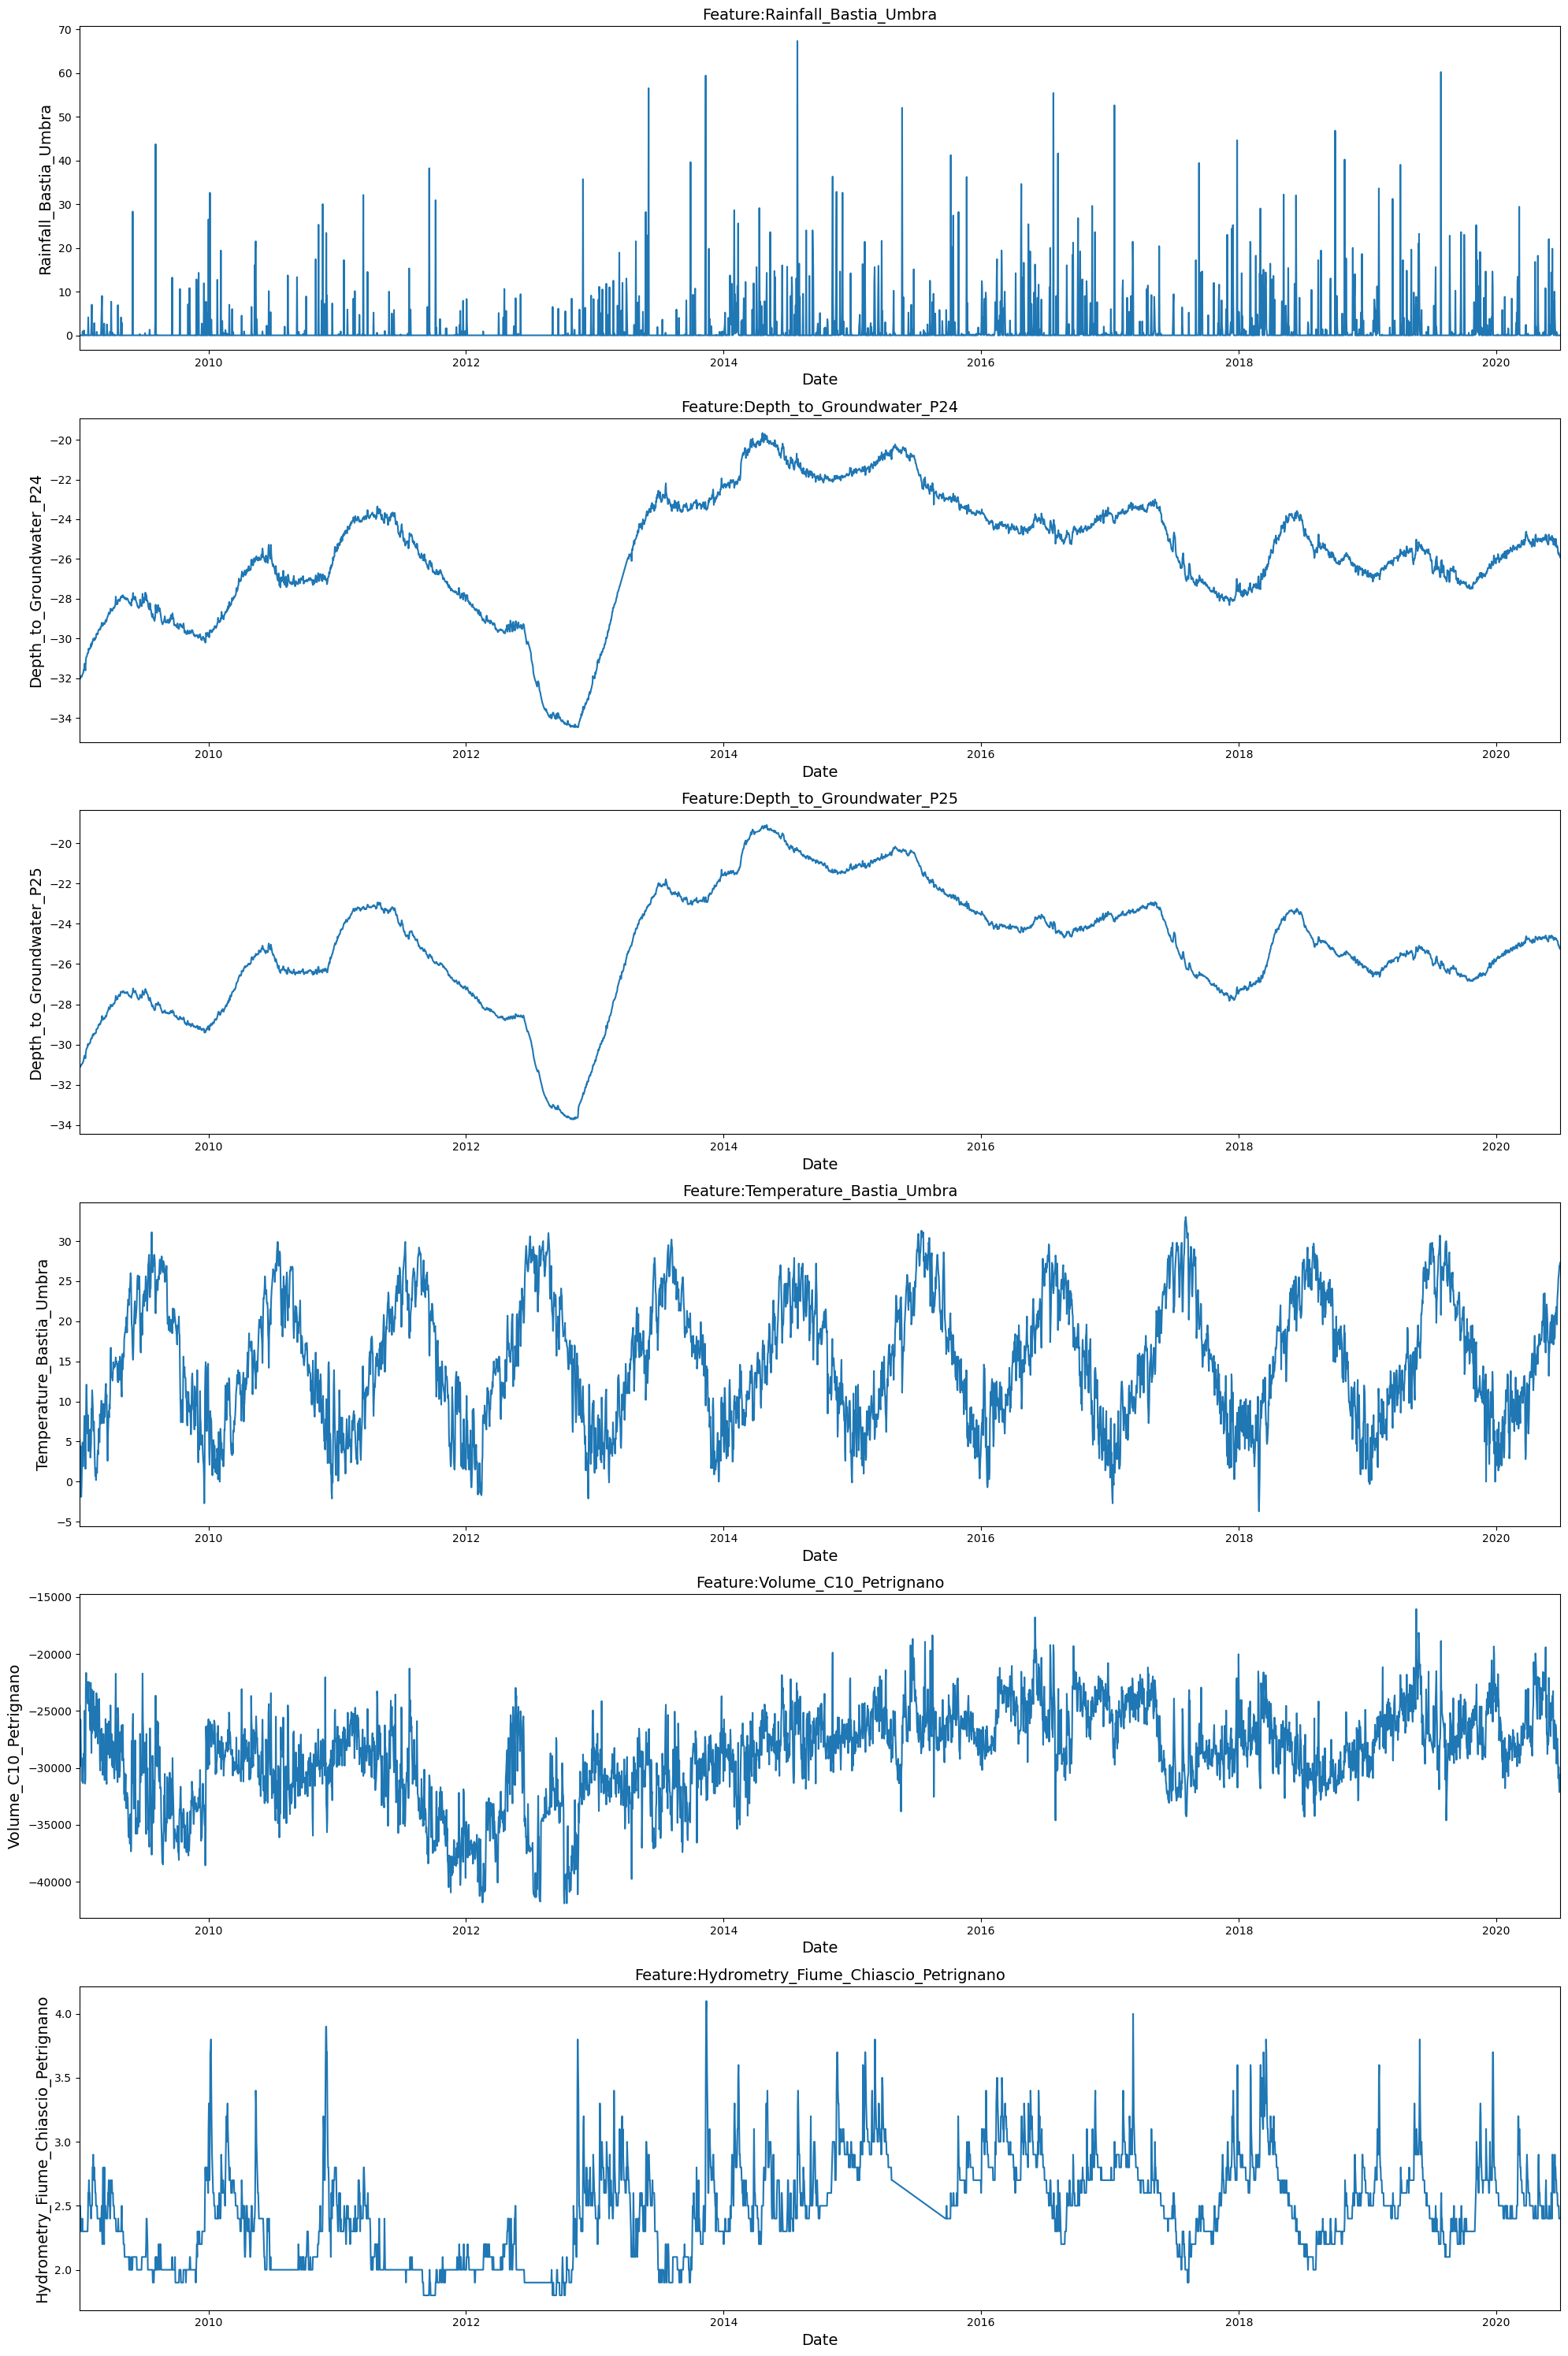

In [12]:
f,ax = plt.subplots(nrows=6,ncols=1,figsize=(20,30))

#以列取修改后的数据，删去日期列作为x，其他数据作为y
for i,column in enumerate(df1.drop('Date',axis=1).columns):
    sns.lineplot(x=df1['Date'],y=df1[column],ax=ax[i])
    ax[i].set_title('Feature:{}'.format(column),fontsize=14)
    ax[i].set_ylabel(ylabel=column,fontsize=14)
    ax[i].set_xlabel(xlabel='Date',fontsize=14)

    ax[i].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])        

plt.tight_layout()

In [15]:
from sklearn.model_selection import TimeSeriesSplit

N_SPLITS = 3

X = df1['Date']
y = df1['Depth_to_Groundwater_P25']

folds = TimeSeriesSplit(n_splits=N_SPLITS)

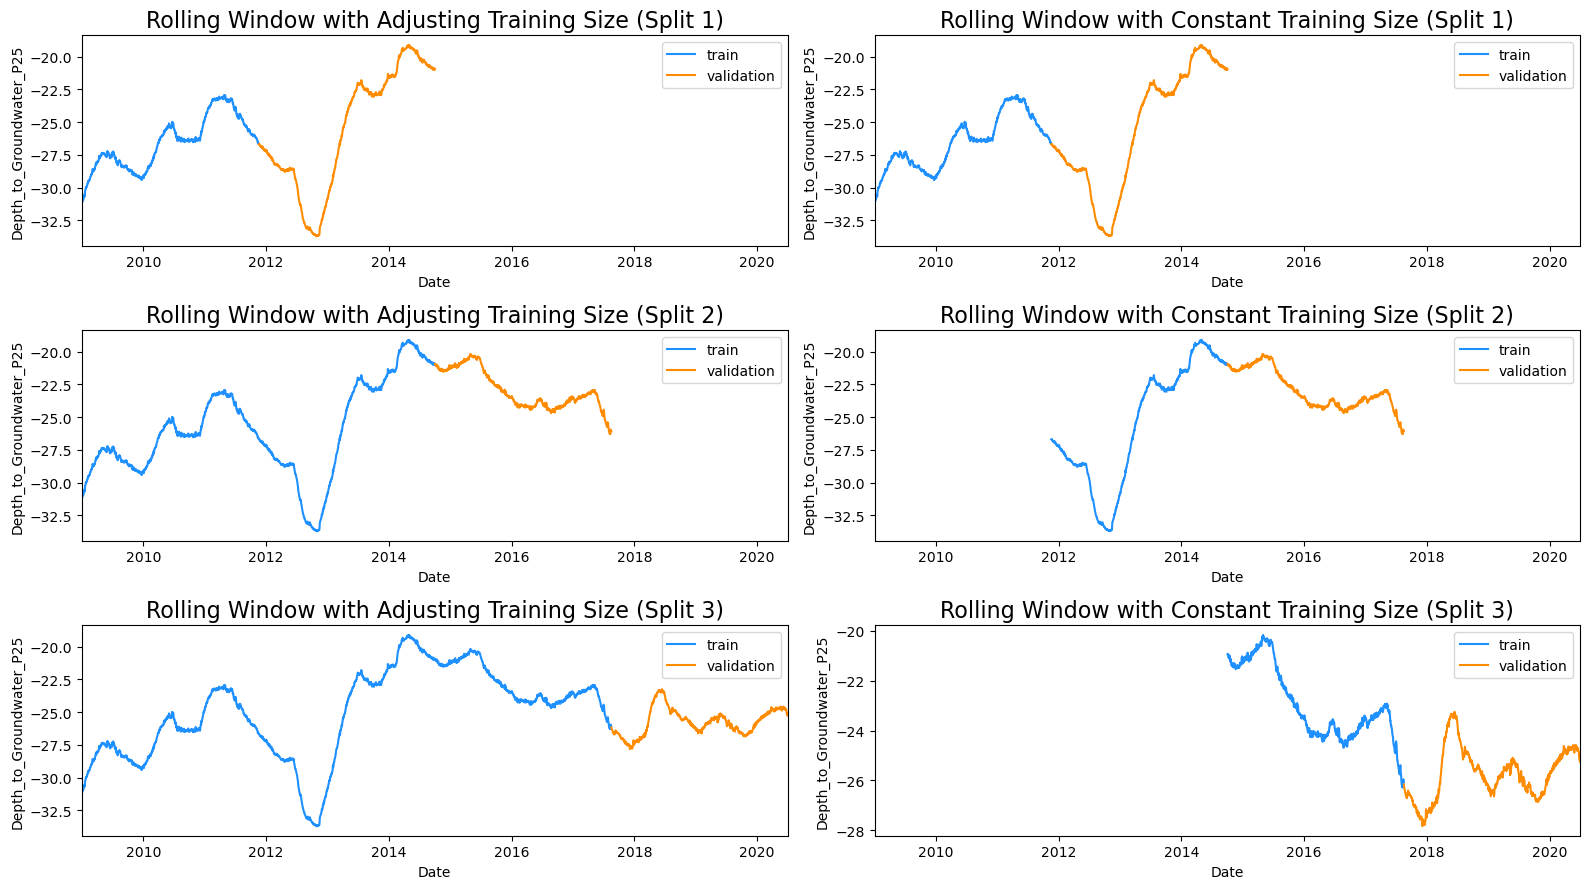

In [16]:
f, ax = plt.subplots(nrows=N_SPLITS, ncols=2, figsize=(16, 9))

for i, (train_index, valid_index) in enumerate(folds.split(X)):
    X_train, X_valid = X[train_index], X[valid_index]
    y_train, y_valid = y[train_index], y[valid_index]

    sns.lineplot(
        x=X_train, 
        y=y_train, 
        ax=ax[i,0], 
        color='dodgerblue', 
        label='train'
    )
    sns.lineplot(
        x=X_train[len(X_train) - len(X_valid):(len(X_train) - len(X_valid) + len(X_valid))], 
        y=y_train[len(X_train) - len(X_valid):(len(X_train) - len(X_valid) + len(X_valid))], 
        ax=ax[i,1], 
        color='dodgerblue', 
        label='train'
    )

    for j in range(2):
        sns.lineplot(x= X_valid, y= y_valid, ax=ax[i, j], color='darkorange', label='validation')
    ax[i, 0].set_title(f"Rolling Window with Adjusting Training Size (Split {i+1})", fontsize=16)
    ax[i, 1].set_title(f"Rolling Window with Constant Training Size (Split {i+1})", fontsize=16)

for i in range(N_SPLITS):
    ax[i, 0].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])
    ax[i, 1].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])
    
plt.tight_layout()
plt.show()

In [17]:
train_size = int(0.85 * len(df1))
test_size = len(df1) - train_size

univariate_df = df[['Date', 'Depth_to_Groundwater_P25']].copy()
univariate_df.columns = ['ds', 'y']

train = univariate_df.iloc[:train_size, :]

x_train, y_train = pd.DataFrame(univariate_df.iloc[:train_size, 0]), pd.DataFrame(univariate_df.iloc[:train_size, 1])
x_valid, y_valid = pd.DataFrame(univariate_df.iloc[train_size:, 0]), pd.DataFrame(univariate_df.iloc[train_size:, 1])

print(len(train), len(x_valid))

3569 1654


In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

from fbprophet import Prophet


# Train the model
model = Prophet()
model.fit(train)

# x_valid = model.make_future_dataframe(periods=test_size, freq='w')

# Predict on valid set
y_pred = model.predict(x_valid)

# Calcuate metrics
score_mae = mean_absolute_error(y_valid, y_pred.tail(test_size)['yhat'])
score_rmse = math.sqrt(mean_squared_error(y_valid, y_pred.tail(test_size)['yhat']))

print(Fore.GREEN + 'RMSE: {}'.format(score_rmse))

ModuleNotFoundError: No module named 'fbprophet'